Available fonts: ['STIXNonUnicode', 'DejaVu Sans', 'cmss10', 'STIXNonUnicode', 'STIXGeneral', 'STIXSizeOneSym', 'DejaVu Sans', 'cmex10', 'STIXSizeFourSym', 'DejaVu Serif', 'cmmi10', 'cmb10', 'STIXNonUnicode', 'DejaVu Serif', 'STIXSizeTwoSym', 'STIXSizeThreeSym', 'STIXGeneral', 'STIXSizeTwoSym', 'cmr10', 'DejaVu Serif', 'STIXNonUnicode', 'STIXSizeThreeSym', 'DejaVu Sans Display', 'DejaVu Serif', 'STIXGeneral', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'cmsy10', 'cmtt10', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXGeneral', 'DejaVu Serif Display', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'STIXSizeFiveSym', 'STIXSizeOneSym', 'Norasi', 'Dyuthi', 'Impact', 'Nimbus Mono PS', 'FreeSerif', 'Khmer OS', 'STIXSizeThreeSym', 'Andale Mono', 'Arial Black', 'Kinnari', 'Rasa', 'Kinnari', 'Padauk', 'STIXSizeFiveSym', 'Comic Sans MS', 'Padauk Book', 'Keraleeyam', 'DejaVu Sans Mono', 'KacstFarsi', 'URW Bookman', 'Comic Sans MS', 'Liberation Serif', 'Tlwg Typo', 'Norasi', 'Cantarell', 'Chilanka', 

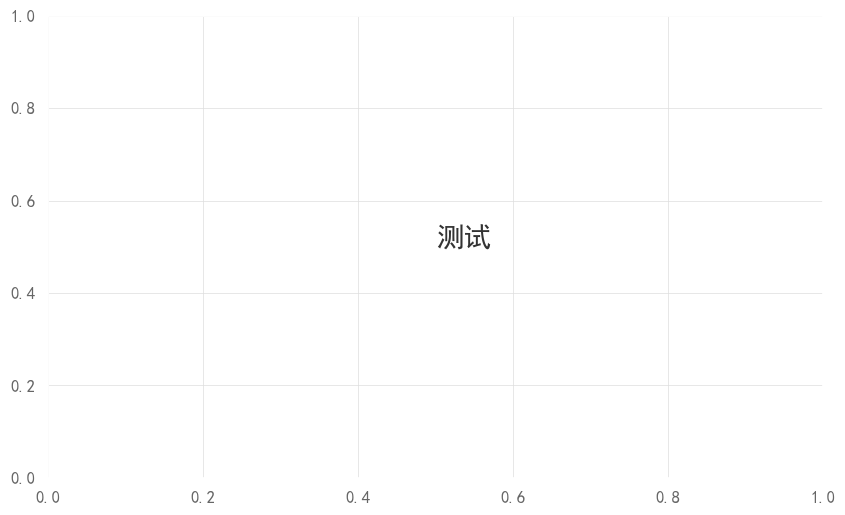

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns


import seaborn as sns
# mpl.rcParams['font.sans-serif'] = ['SimSun', 'KaiTi', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
mpl.rcParams['font.family'] = 'SimHei'  # Adjust to the font available in your system

mpl.rcParams['font.size'] = 14  # 字体大小
mpl.rcParams['axes.unicode_minus'] = False  # 正常显示负号

plt.rc('font', family='serif', serif='SimHei')  # Change 'serif' and 'Times New Roman' to your desired font family and name



import quantstats_lumi as qs


import matplotlib.font_manager as fm

# Check available fonts
available_fonts = [f.name for f in fm.fontManager.ttflist]
print("Available fonts:", available_fonts)
if 'Noto Sans CJK JP' in available_fonts:
    print("Noto Sans CJK JP font is available.")
else:
    print("Noto Sans CJK JP font is not available.")



# Create a plot with fallback font

plt.figure()
plt.text(0.5, 0.5, '测试', fontname='SimHei', fontsize=20)  # Use a CJK compatible font for specific text
plt.show()


start_date = '2024-01-01'
end_date = '2024-09-29'

In [6]:
import os
from quant_free.dataset.us_equity_load import *
from quant_free.common.us_equity_common import *
class heat_map:
  def __init__(self, df = None, start_date = '2024-01-01', end_date = '2024-09-27', vmin = -1, vmax = 1):

    self.vmin = vmin
    self.vmax = vmax
    date = us_equity_get_trade_date_within_range(start_date = start_date, end_date = end_date, dir_option = 'xq')
    df = df.loc[date, :]
    self.data = (df * 100).round(2)
    # else:
      # print(f"file {file} is not exist")
      # exit(-1)
      
  def draw_plot(self, data, xlabel=None, cbar=True, cmap='coolwarm'):
      width = 40*len(data.columns)
      high = 15*len(data.index)
      if width > 2100:width = 2100
      if high < 520:high = 520

      ylabel = data.index
      
      fig = plt.figure(figsize=(width/48,high/72))
      if xlabel is None:
          sns.heatmap(data,fmt='.1f', yticklabels=ylabel,
                        linewidths=0.5, annot = True, cbar=cbar,cmap=cmap, vmin=self.vmin, vmax=self.vmax)
      else:
          sns.heatmap(data,fmt='.1f', yticklabels=ylabel, xticklabels=xlabel, 
                        linewidths=0.5, annot = True, cbar=cbar,cmap=cmap, vmin=self.vmin, vmax=self.vmax)
      plt.xticks(rotation = -90)
      plt.show()
  
  def draw(self, window=3, absolute=False, plot=True):
      if absolute:
          self.trend = self.data.apply(lambda x: round((x-x.shift(window))/x.shift(window),2), axis=0)
          self.trend = self.data.apply(lambda x: round((x-x.shift(window))/x.shift(window),2), axis=0)
          if plot: self.draw_plot(self.trend, cmap='coolwarm',vmin=-0.8, vmax=0.8)     
      else:

          self.trend = self.data 
              
          if plot:
              xlabel = self.trend.columns.values
              
              block_count = len(self.trend.columns)
              if block_count > 50:
                  self.draw_plot(self.trend.iloc[:,0:int(block_count/2)], xlabel[0:int(block_count/2)], cmap='RdYlGn')
                  self.draw_plot(self.trend.iloc[:,int(block_count/2):block_count], xlabel[int(block_count/2):block_count], cmap='RdYlGn')
              else:
                  self.draw_plot(self.trend, cmap='RdYlGn',vmin=-1, vmax=1)
      # return self.trend

  def get_data(self):
    return self.data

xiuqiu price heatmap

In [ ]:
# %%time

df= us_dir1_load_csv(dir0 = 'symbol', dir1 = 'xq', filename='index_price_ratio.csv')
heat = heat_map(df, start_date = start_date, end_date = end_date)
heat.draw()

xueqiu amount heatmap

In [ ]:
# %%time

df= us_dir1_load_csv(dir0 = 'symbol', dir1 = 'xq', filename='index_amount_ratio.csv')
heat = heat_map(df, start_date = start_date, end_date = end_date, vmin = -40, vmax = 40)
heat.draw()

fh price heatmap

In [ ]:
# %%time
df= us_dir1_load_csv(dir0 = 'symbol', dir1 = 'fh', filename='index_price_ratio.csv')
heat = heat_map(df, start_date = start_date, end_date = end_date)
heat.draw()

fh amount heatmap

In [ ]:
# %%time
df= us_dir1_load_csv(dir0 = 'symbol', dir1 = 'fh', filename='index_amount_ratio.csv')
heat = heat_map(df, start_date = start_date, end_date = end_date, vmin = -40, vmax = 40)
heat.draw()